# سوال اول

اولین مرحله اضافه کردن کتابخانه های مورد نیاز ماست

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#برای تست مدلم
import sklearn
import sklearn.datasets
import sklearn.linear_model
np.random.seed(1) 
import pandas as pd
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split

%matplotlib inline

C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


در این مرحله من دیتای خورد را با کتابخانه پانداس میگیرم و برای فهم بهتر نام ستون تعیین میکنم

In [2]:
colNames = ["id", "age", "name","kind","resave", "chanel", "time","measure", "sex", "label"]
dataset = pd.read_csv("data.csv", names=colNames,delimiter=',',header=None)
dataset.head()

,id,age,name,kind,resave,chanel,time,measure,sex,label
0,45341,28,1,1,28.13,1,34,1,112.5,1
1,12958,37,2,1,12.95,1,53,1,37.0,0
2,18233,27,3,0,0.00,1,28,0,13.0,0
3,31742,36,3,0,0.00,1,1,0,34.0,0
4,14381,26,4,0,23.76,1,33,0,39.6,0


برای درک بهتر ارتباطات در هر ستون و بررسی میزان اثر ان بر برچسب هر سطر ان را روی نمودار میبریم.
برای این کار ای دی را نسبت به هر ویژگی و ارتباط ان رسم میکنم

C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


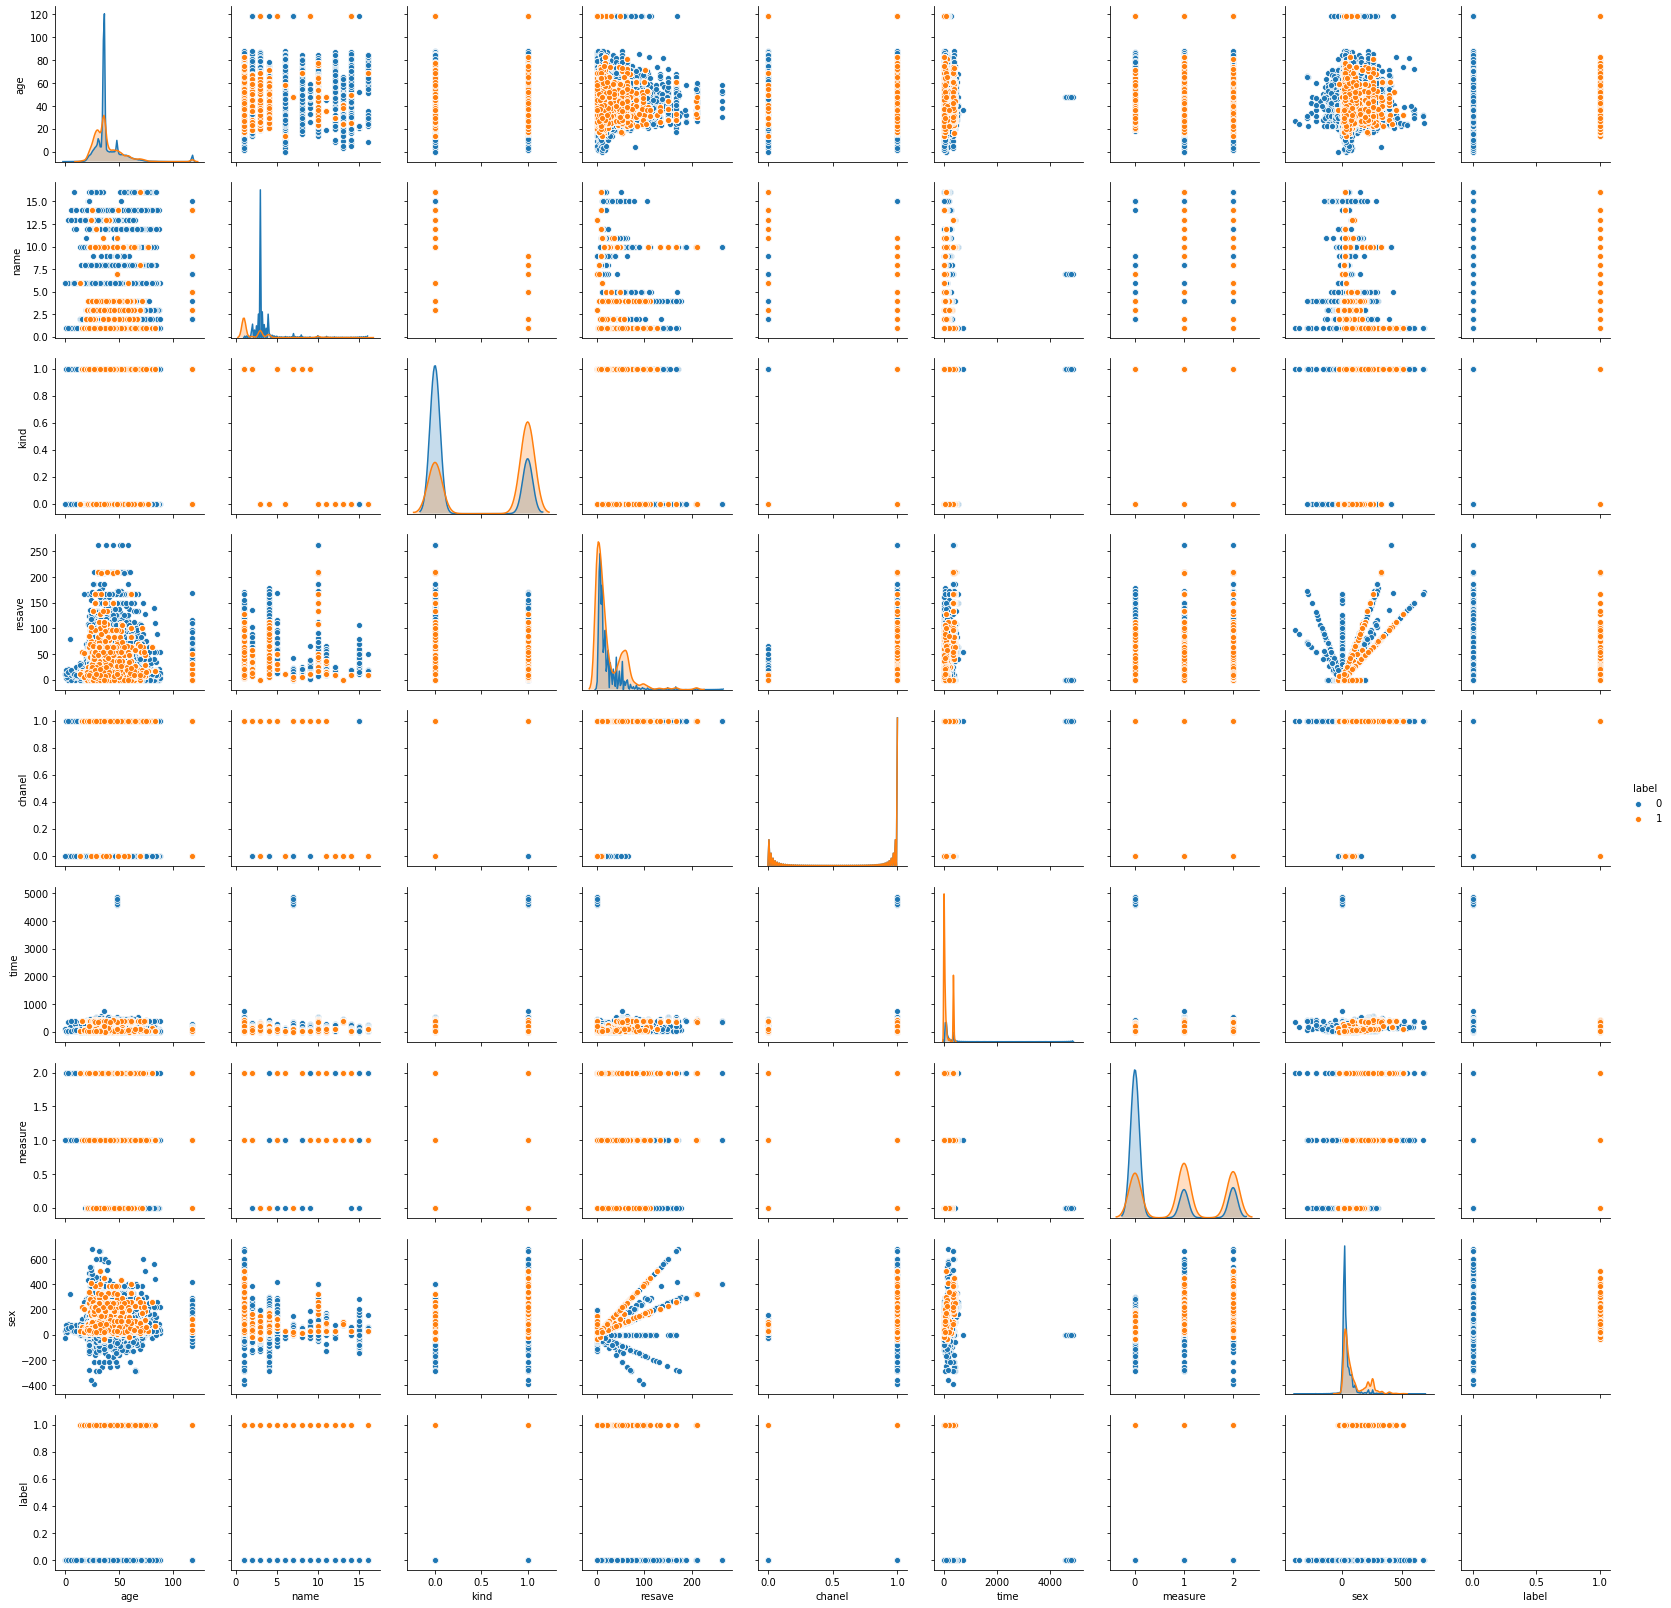

In [4]:
g = sns.pairplot(dataset.drop("id", axis=1), hue="label")

برای مثال همانطور که میبینیم جنسیت فاکتور با ارزشی نیست

در این تمرین برای نرمالسازی و بردن داده ها به رنج خاصی از توابع متعدد و کتابخانه های متعدد می توان استفاده کرد برای مثال برای نرمالسازی داده ها و بردن ان ها به رنج -1 و +1 هستند و چون داده هایمان همگی مثبت هستند ابتدا باید با دستور زیر میانگین داده ها را 0 کرد  

x-=np.mean(x, axis=0)

بعد میتوان برای بردن داده ها به رنج منفی یک تا یک استفاده کرد یا از سیگموید برای بردن داده ها به رنج صفر و یک استفاده کردtanh(x)

از انجا که داده هایمان زیاد نیست که برای پایین اوردن زمان اجرا و همچنین اختیاری بودن از نرمالسازی صرف نظر شد از سویی نرمالسازی ممکن است ارزش پارامتر برای مثال جنسیت را زیاد کند

یا دادگان را نرمالسازی کنیم به این صورت که استاندارد در هر ویژگی را حساب کرده تقسیم بر ان میکنیم


x/=np.std(x,axis=0) فرمول

راه حل های دیگری نیز هست مانند تبدیل ماتریس کواریانس به یک ماتریس قطری یا تبدیل ماتریس کواریانس به یک ماتریس همانی

استفاده از مرحله پیش پردازش و نرمالسازی تاثیری در نتیجه ما ندارد فقط سرعت کار را بالا میبرد

# سوال 2

برای تبدیل دادگان به دو دسته مجموعه اموزشی و مجموعه تست داریم

In [3]:
columns = ["age", "name","kind","resave", "chanel", "time","measure", "sex"]
x = pd.DataFrame(dataset, columns=columns)

columns = ['label']
y = pd.DataFrame(dataset, columns=columns)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [4]:
x=x_train.to_numpy()
y=y_train.to_numpy()
x=x.reshape(8,49830)
y=y.reshape(1,49830)
shape_X = x.shape
shape_Y = y.shape
m = shape_X[1] 
print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (8, 49830)
The shape of Y is: (1, 49830)
I have m = 49830 training examples!


In [5]:
test_set_x=x_test.to_numpy()
test_set_y=y_test.to_numpy()
test_set_x=test_set_x.reshape(8,12458)
test_set_y=test_set_y.reshape(1,12458)
shape_test_set_x=test_set_x.shape
shape_test_set_y=test_set_y.shape
print ('The shape of test_set_x is: ' + str(shape_test_set_x))
print ('The shape of test_set_y is: ' + str(shape_test_set_y))

The shape of test_set_x is: (8, 12458)
The shape of test_set_y is: (1, 12458)


# سوال 3

شبکه عصبی دولایه شبکه عصبی با یک لایه مخفی است 

برای اینکار من یک لایه ورودی دو ماتریس وزن براساس تعداد نرون ها باید بسازم 

تعداد نرون ها براساس مقالات به فاکتورهایی بستگی دارد از جمله این فاکتور ها تعداد نرون های ورودی تعداد نرون های خروجی عامل مقیاس بندی و همچنین تعداد نمونه های موجود در داده آموزشی که در اینجا تعداد نرون ها را 10 در نظر گرفتیم

In [43]:
e=[]

In [44]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))    
    return s

In [45]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 10
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)

In [46]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h,n_x)* 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))    
    print("w1:======",W1,"%","w2:======",W2)
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [47]:
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    assert(A2.shape == (1, X.shape[1]))    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return A2, cache

In [48]:
def compute_cost(A2, Y, parameters):    
    m = Y.shape[1] 
    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1 - A2),1 - Y)
    cost = - np.sum(logprobs) * (1 / m) 
    cost = np.squeeze(cost)
    assert(isinstance(cost, float))
#    e.append(cost)
    return cost

In [49]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    dZ2= A2 - Y
    dW2 = 1 / m *(np.dot(dZ2,A1.T))
    db2 = 1 / m *(np.sum(dZ2,axis = 1,keepdims = True))
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1, 2))
    dW1 = 1 / m *(np.dot(dZ1,X.T))
    db1 = 1 / m *(np.sum(dZ1,axis = 1,keepdims = True))
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    return grads

In [50]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}    
    return parameters

In [51]:
def nn_model(X, Y, n_h, num_iterations , print_cost=False):
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    parameters = initialize_parameters(n_x,n_h,n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    for i in range(0, num_iterations):         
        A2, cache = forward_propagation(X,parameters)        
        cost = compute_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y) 
        parameters = update_parameters(parameters, grads)
        e.append(cost)
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    return parameters

In [52]:
def predict(parameters, X):
    A2, cache = forward_propagation(X,parameters)
    predictions = (A2 > 0.5)    
    return predictions

In [53]:
parameters = nn_model(x, y, n_h = 10, num_iterations = 100, print_cost=True)

w1:====== [[-4.16757847e-03 -5.62668272e-04 -2.13619610e-02  1.64027081e-02
  -1.79343559e-02 -8.41747366e-03  5.02881417e-03 -1.24528809e-02]
 [-1.05795222e-02 -9.09007615e-03  5.51454045e-03  2.29220801e-02
   4.15393930e-04 -1.11792545e-02  5.39058321e-03 -5.96159700e-03]
 [-1.91304965e-04  1.17500122e-02 -7.47870949e-03  9.02525097e-05
  -8.78107893e-03 -1.56434170e-03  2.56570452e-03 -9.88779049e-03]
 [-3.38821966e-03 -2.36184031e-03 -6.37655012e-03 -1.18761229e-02
  -1.42121723e-02 -1.53495196e-03 -2.69056960e-03  2.23136679e-02]
 [-2.43476758e-02  1.12726505e-03  3.70444537e-03  1.35963386e-02
   5.01857207e-03 -8.44213704e-03  9.76147160e-08  5.42352572e-03]
 [-3.13508197e-03  7.71011738e-03 -1.86809065e-02  1.73118467e-02
   1.46767801e-02 -3.35677339e-03  6.11340780e-03  4.79705919e-04]
 [-8.29135289e-03  8.77102184e-04  1.00036589e-02 -3.81092518e-03
  -3.75669423e-03 -7.44707629e-04  4.33496330e-03  1.27837923e-02]
 [-6.34679305e-03  5.08396243e-03  2.16116006e-03 -1.858612

In [54]:
predictions = predict(parameters, x)
print ('Accuracy: %d' % float((np.dot(y,predictions.T) + np.dot(1-y,1-predictions.T))/float(y.size)*100) + '%')

Accuracy: 80%


# سوال 4

در این قسمت برای درک بهتر صحت مشتق گیری همین کد بالا را برای یک مقدار محاسبه میکنیم و اگر از مقدار کمتر بود یعنی بسیار ناچیز و محاسبات ما درست است

In [30]:
def forward_propagation(x, theta):
    J = theta * x    
    return J

In [31]:
x, theta = 2, 4
J = forward_propagation(x, theta)
print ("J = " + str(J))

J = 8


In [32]:
def backward_propagation(x, theta):
    dtheta = x    
    return dtheta

In [33]:
x, theta = 2, 4
dtheta = backward_propagation(x, theta)
print ("dtheta = " + str(dtheta))

dtheta = 2


In [34]:
def gradient_check(x, theta, epsilon = 1e-7):
    thetaplus = theta + epsilon                               
    thetaminus = theta - epsilon                              
    J_plus = forward_propagation(x, thetaplus)               
    J_minus = forward_propagation(x, thetaminus)              
    gradapprox = (J_plus - J_minus) / (2 * epsilon)          
    grad = backward_propagation(x,theta)    
    numerator = np.linalg.norm(grad - gradapprox)                   
    denominator = np.linalg.norm(grad) + np.linalg.norm(gradapprox) 
    difference = numerator / denominator                               
    if difference < 1e-7:
        print ("The gradient is correct!")
    else:
        print ("The gradient is wrong!")
    
    return difference

In [35]:
x, theta = 2, 4
difference = gradient_check(x, theta)
print("difference = " + str(difference))

The gradient is correct!
difference = 2.919335883291695e-10


# سوال 5

عملکرد مدل ما بر روی هر دو داده اموزشی و ازمایشی خوب است و اختلاف کمی دارد اگر اختلاف زیاد بود میتوانستیم تابع هزینه مربوط به وزن ها را اضافه کنیم یعنی همان ضریب تنظیم تا هر دو دسته به نسبت خوب باشند یا میشد از توابع پیچیده تر نیز استفاده شود

In [56]:
parameters = nn_model(x, y, n_h = 10, num_iterations = 100, print_cost=True)

w1:====== [[-4.16757847e-03 -5.62668272e-04 -2.13619610e-02  1.64027081e-02
  -1.79343559e-02 -8.41747366e-03  5.02881417e-03 -1.24528809e-02]
 [-1.05795222e-02 -9.09007615e-03  5.51454045e-03  2.29220801e-02
   4.15393930e-04 -1.11792545e-02  5.39058321e-03 -5.96159700e-03]
 [-1.91304965e-04  1.17500122e-02 -7.47870949e-03  9.02525097e-05
  -8.78107893e-03 -1.56434170e-03  2.56570452e-03 -9.88779049e-03]
 [-3.38821966e-03 -2.36184031e-03 -6.37655012e-03 -1.18761229e-02
  -1.42121723e-02 -1.53495196e-03 -2.69056960e-03  2.23136679e-02]
 [-2.43476758e-02  1.12726505e-03  3.70444537e-03  1.35963386e-02
   5.01857207e-03 -8.44213704e-03  9.76147160e-08  5.42352572e-03]
 [-3.13508197e-03  7.71011738e-03 -1.86809065e-02  1.73118467e-02
   1.46767801e-02 -3.35677339e-03  6.11340780e-03  4.79705919e-04]
 [-8.29135289e-03  8.77102184e-04  1.00036589e-02 -3.81092518e-03
  -3.75669423e-03 -7.44707629e-04  4.33496330e-03  1.27837923e-02]
 [-6.34679305e-03  5.08396243e-03  2.16116006e-03 -1.858612

In [59]:
predictions = predict(parameters, x)
print ('Accuracy: %d' % int((np.dot(y,predictions.T) + np.dot(1-y,1-predictions.T))/float(y.size)*100) + '%')

Accuracy: 80%


In [53]:
parameters = nn_model(test_set_x, test_set_y, n_h = 10, num_iterations = 100, print_cost=True)

w1:====== [[-4.16757847e-03 -5.62668272e-04 -2.13619610e-02  1.64027081e-02
  -1.79343559e-02 -8.41747366e-03  5.02881417e-03 -1.24528809e-02]
 [-1.05795222e-02 -9.09007615e-03  5.51454045e-03  2.29220801e-02
   4.15393930e-04 -1.11792545e-02  5.39058321e-03 -5.96159700e-03]
 [-1.91304965e-04  1.17500122e-02 -7.47870949e-03  9.02525097e-05
  -8.78107893e-03 -1.56434170e-03  2.56570452e-03 -9.88779049e-03]
 [-3.38821966e-03 -2.36184031e-03 -6.37655012e-03 -1.18761229e-02
  -1.42121723e-02 -1.53495196e-03 -2.69056960e-03  2.23136679e-02]
 [-2.43476758e-02  1.12726505e-03  3.70444537e-03  1.35963386e-02
   5.01857207e-03 -8.44213704e-03  9.76147160e-08  5.42352572e-03]
 [-3.13508197e-03  7.71011738e-03 -1.86809065e-02  1.73118467e-02
   1.46767801e-02 -3.35677339e-03  6.11340780e-03  4.79705919e-04]
 [-8.29135289e-03  8.77102184e-04  1.00036589e-02 -3.81092518e-03
  -3.75669423e-03 -7.44707629e-04  4.33496330e-03  1.27837923e-02]
 [-6.34679305e-03  5.08396243e-03  2.16116006e-03 -1.858612

In [60]:
predictions = predict(parameters, test_set_x)
print ('Accuracy: %d' % int((np.dot(test_set_y,predictions.T) + np.dot(1-test_set_y,1-predictions.T))/float(test_set_y.size)*100) + '%')

Accuracy: 79%


In [61]:
results = [79,80]
# calculate mean
m = sum(results) / len(results)

# calculate variance using a list comprehension
var_res = sum((xi - m) ** 2 for xi in results) / len(results)

In [62]:
print("mean:===",m)
print("variance:===",var_res)

mean:=== 79.5
variance:=== 0.25


# سوال 6

In [79]:
e=[]

In [80]:
parameters = nn_model(x, y, n_h = 10, num_iterations = 100, print_cost=True)

w1:====== [[-4.16757847e-03 -5.62668272e-04 -2.13619610e-02  1.64027081e-02
  -1.79343559e-02 -8.41747366e-03  5.02881417e-03 -1.24528809e-02]
 [-1.05795222e-02 -9.09007615e-03  5.51454045e-03  2.29220801e-02
   4.15393930e-04 -1.11792545e-02  5.39058321e-03 -5.96159700e-03]
 [-1.91304965e-04  1.17500122e-02 -7.47870949e-03  9.02525097e-05
  -8.78107893e-03 -1.56434170e-03  2.56570452e-03 -9.88779049e-03]
 [-3.38821966e-03 -2.36184031e-03 -6.37655012e-03 -1.18761229e-02
  -1.42121723e-02 -1.53495196e-03 -2.69056960e-03  2.23136679e-02]
 [-2.43476758e-02  1.12726505e-03  3.70444537e-03  1.35963386e-02
   5.01857207e-03 -8.44213704e-03  9.76147160e-08  5.42352572e-03]
 [-3.13508197e-03  7.71011738e-03 -1.86809065e-02  1.73118467e-02
   1.46767801e-02 -3.35677339e-03  6.11340780e-03  4.79705919e-04]
 [-8.29135289e-03  8.77102184e-04  1.00036589e-02 -3.81092518e-03
  -3.75669423e-03 -7.44707629e-04  4.33496330e-03  1.27837923e-02]
 [-6.34679305e-03  5.08396243e-03  2.16116006e-03 -1.858612

In [81]:
e

[0.6904865164130443,
 0.5362036553668209,
 0.5313391289591991,
 0.5151096284748454,
 0.5161412729818964,
 0.5038402705884971,
 0.5027780020819809,
 0.5006846387376667,
 0.5001715107826581,
 0.4996781601068703,
 0.49949031309265446,
 0.49934694018523595,
 0.4992738698740525,
 0.4992217268717696,
 0.4991920430891374,
 0.499171938695477,
 0.49915789004107614,
 0.49914656455662465,
 0.49913751799152506,
 0.4991298948575574,
 0.4991232747327105,
 0.49911697083760564,
 0.4991113053289624,
 0.499106521242587,
 0.49910120696110827,
 0.4990971383490677,
 0.4990923157504105,
 0.49908781480795467,
 0.4990840626252547,
 0.4990795842210007,
 0.49907610861205015,
 0.4990719024361405,
 0.49906775714477974,
 0.49906413997274773,
 0.49905986203375685,
 0.4990547186851238,
 0.49904892841288195,
 0.4990443805360186,
 0.49904033369172474,
 0.49903650117324905,
 0.49903272182419445,
 0.4990291218687323,
 0.49902602836374443,
 0.4990227032154403,
 0.4990191125656772,
 0.4990167667173854,
 0.4990151537127307

In [82]:
costt=[]
for i in range(len(e)-1):
    costt.append(e[i])

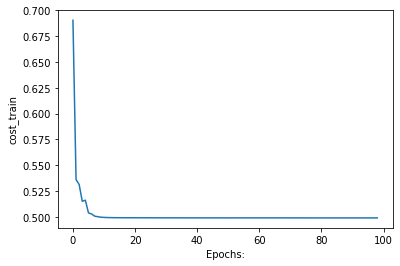

In [83]:
import matplotlib.pyplot as plt1

# plotting Loss
plt1.plot(costt)
plt1.ylabel('cost_train')
plt1.xlabel("Epochs:")
plt1.show()

In [84]:
e=[]

In [85]:
parameters = nn_model(test_set_x, test_set_y, n_h = 10, num_iterations = 100, print_cost=True)

w1:====== [[-4.16757847e-03 -5.62668272e-04 -2.13619610e-02  1.64027081e-02
  -1.79343559e-02 -8.41747366e-03  5.02881417e-03 -1.24528809e-02]
 [-1.05795222e-02 -9.09007615e-03  5.51454045e-03  2.29220801e-02
   4.15393930e-04 -1.11792545e-02  5.39058321e-03 -5.96159700e-03]
 [-1.91304965e-04  1.17500122e-02 -7.47870949e-03  9.02525097e-05
  -8.78107893e-03 -1.56434170e-03  2.56570452e-03 -9.88779049e-03]
 [-3.38821966e-03 -2.36184031e-03 -6.37655012e-03 -1.18761229e-02
  -1.42121723e-02 -1.53495196e-03 -2.69056960e-03  2.23136679e-02]
 [-2.43476758e-02  1.12726505e-03  3.70444537e-03  1.35963386e-02
   5.01857207e-03 -8.44213704e-03  9.76147160e-08  5.42352572e-03]
 [-3.13508197e-03  7.71011738e-03 -1.86809065e-02  1.73118467e-02
   1.46767801e-02 -3.35677339e-03  6.11340780e-03  4.79705919e-04]
 [-8.29135289e-03  8.77102184e-04  1.00036589e-02 -3.81092518e-03
  -3.75669423e-03 -7.44707629e-04  4.33496330e-03  1.27837923e-02]
 [-6.34679305e-03  5.08396243e-03  2.16116006e-03 -1.858612

In [86]:
e

[0.6905436234487838,
 0.5404189653309547,
 0.5382625938123128,
 0.5233917532283413,
 0.5252134143709214,
 0.5111673314895758,
 0.5100061510342473,
 0.5076746464626392,
 0.5070876035363008,
 0.5066061531312887,
 0.5064101253761949,
 0.5062577270240484,
 0.5061690768778975,
 0.5061001570122822,
 0.5060530067903828,
 0.5060141334399854,
 0.5059704974431197,
 0.505927646236425,
 0.5058896735509356,
 0.5058637275922977,
 0.5058365664925223,
 0.5058190643884196,
 0.5058098349703433,
 0.5058350158681446,
 0.5057893789895322,
 0.5058067727158371,
 0.5058225027505205,
 0.5059264642681167,
 0.5058589076552199,
 0.505856504165017,
 0.50594412502065,
 0.506031816457995,
 0.5059573783695541,
 0.5058123447890736,
 0.5058234798190895,
 0.5059148632461767,
 0.5059285765643172,
 0.5058402099039986,
 0.5059311236687115,
 0.506033779180774,
 0.5059068347444052,
 0.5058390852216951,
 0.505935315247926,
 0.5060027364120789,
 0.5060219209059686,
 0.5062108912323937,
 0.50612114644344,
 0.506012068602948,
 0

In [87]:
costt=[]
for i in range(len(e)-1):
    costt.append(e[i])

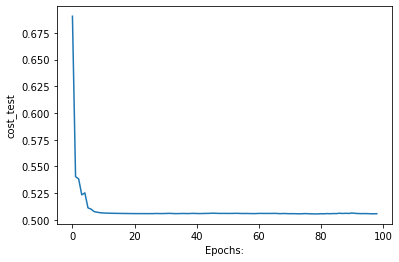

In [89]:
import matplotlib.pyplot as plt1

# plotting Loss
plt1.plot(costt)
plt1.ylabel('cost_test')
plt1.xlabel("Epochs:")
plt1.show()

# سوال 7

در این بخش خواهیم دید که اگر مقدار ما خیلی بزرگ باشد مقادیر اول پایین می اید ولی بعد از جواب بهینه ما دور میشود همچنین اگر بسیار کم باشد خیلی دیر به جواب بهینه میرسیم ولی نمودار محدب است به جواب میرسیم اما خیلی دیر

In [16]:
#learning_rate=0.1
e=[]

In [17]:
def update_parameters(parameters, grads, learning_rate = 0.0001):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}    
    return parameters

In [18]:
parameters = nn_model(x, y, n_h = 10, num_iterations = 100, print_cost=True)

w1:====== [[-4.16757847e-03 -5.62668272e-04 -2.13619610e-02  1.64027081e-02
  -1.79343559e-02 -8.41747366e-03  5.02881417e-03 -1.24528809e-02]
 [-1.05795222e-02 -9.09007615e-03  5.51454045e-03  2.29220801e-02
   4.15393930e-04 -1.11792545e-02  5.39058321e-03 -5.96159700e-03]
 [-1.91304965e-04  1.17500122e-02 -7.47870949e-03  9.02525097e-05
  -8.78107893e-03 -1.56434170e-03  2.56570452e-03 -9.88779049e-03]
 [-3.38821966e-03 -2.36184031e-03 -6.37655012e-03 -1.18761229e-02
  -1.42121723e-02 -1.53495196e-03 -2.69056960e-03  2.23136679e-02]
 [-2.43476758e-02  1.12726505e-03  3.70444537e-03  1.35963386e-02
   5.01857207e-03 -8.44213704e-03  9.76147160e-08  5.42352572e-03]
 [-3.13508197e-03  7.71011738e-03 -1.86809065e-02  1.73118467e-02
   1.46767801e-02 -3.35677339e-03  6.11340780e-03  4.79705919e-04]
 [-8.29135289e-03  8.77102184e-04  1.00036589e-02 -3.81092518e-03
  -3.75669423e-03 -7.44707629e-04  4.33496330e-03  1.27837923e-02]
 [-6.34679305e-03  5.08396243e-03  2.16116006e-03 -1.858612

In [19]:
e

[0.6904865164130443,
 0.6904630772545437,
 0.6904396340650909,
 0.6904161868064652,
 0.6903927354408939,
 0.6903692799310445,
 0.6903458202400171,
 0.6903223563313359,
 0.6902988881689404,
 0.6902754157171757,
 0.6902519389407831,
 0.6902284578048893,
 0.6902049722749971,
 0.6901814823169736,
 0.6901579878970409,
 0.6901344889817631,
 0.6901109855380377,
 0.6900874775330826,
 0.6900639649344265,
 0.6900404477098947,
 0.6900169258276018,
 0.6899933992559365,
 0.6899698679635515,
 0.6899463319193511,
 0.6899227910924793,
 0.6898992454523072,
 0.6898756949684202,
 0.6898521396106059,
 0.6898285793488397,
 0.6898050141532728,
 0.6897814439942168,
 0.6897578688421302,
 0.6897342886676044,
 0.6897107034413476,
 0.6896871131341693,
 0.6896635177169661,
 0.6896399171607038,
 0.6896163114364017,
 0.6895927005151149,
 0.689569084367919,
 0.6895454629658894,
 0.6895218362800862,
 0.6894982042815352,
 0.6894745669412097,
 0.6894509242300131,
 0.6894272761187599,
 0.6894036225781591,
 0.68937996357

In [21]:
#learning rate=0.0001
# calculate mean
m = sum(e) / len(e)

# calculate variance using a list comprehension
var_res = sum((xi - m) ** 2 for xi in e) / len(e)

In [22]:
print("mean:===",m)
print("variance:===",var_res)

mean:=== 0.6893184674424324
variance:=== 4.6737188005550175e-07


In [37]:
#learning_rate=1
e=[]

In [38]:
def update_parameters(parameters, grads, learning_rate = 2):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}    
    return parameters

In [39]:
parameters = nn_model(x, y, n_h = 10, num_iterations = 100, print_cost=True)

w1:====== [[-4.16757847e-03 -5.62668272e-04 -2.13619610e-02  1.64027081e-02
  -1.79343559e-02 -8.41747366e-03  5.02881417e-03 -1.24528809e-02]
 [-1.05795222e-02 -9.09007615e-03  5.51454045e-03  2.29220801e-02
   4.15393930e-04 -1.11792545e-02  5.39058321e-03 -5.96159700e-03]
 [-1.91304965e-04  1.17500122e-02 -7.47870949e-03  9.02525097e-05
  -8.78107893e-03 -1.56434170e-03  2.56570452e-03 -9.88779049e-03]
 [-3.38821966e-03 -2.36184031e-03 -6.37655012e-03 -1.18761229e-02
  -1.42121723e-02 -1.53495196e-03 -2.69056960e-03  2.23136679e-02]
 [-2.43476758e-02  1.12726505e-03  3.70444537e-03  1.35963386e-02
   5.01857207e-03 -8.44213704e-03  9.76147160e-08  5.42352572e-03]
 [-3.13508197e-03  7.71011738e-03 -1.86809065e-02  1.73118467e-02
   1.46767801e-02 -3.35677339e-03  6.11340780e-03  4.79705919e-04]
 [-8.29135289e-03  8.77102184e-04  1.00036589e-02 -3.81092518e-03
  -3.75669423e-03 -7.44707629e-04  4.33496330e-03  1.27837923e-02]
 [-6.34679305e-03  5.08396243e-03  2.16116006e-03 -1.858612

In [40]:
e

[0.6904865164130443,
 0.5073063195196039,
 0.5516808202838386,
 0.6683248835079965,
 0.9834341270252938,
 0.5423142576645285,
 0.7443663824561055,
 0.7538788732718914,
 1.4823048186726107,
 0.6570954724181776,
 0.7620142052004868,
 1.3701456653131125,
 0.610267047398637,
 0.8108078746117507,
 1.5569760287821133,
 0.7248159550359455,
 0.7024750480669713,
 1.2761537893279307,
 0.5564033332561882,
 0.6709071044364326,
 1.1483298864581724,
 0.5155174567770274,
 0.545128692315139,
 0.6804691473407668,
 0.6312740869767436,
 0.9525945376300962,
 0.502033750504547,
 0.507825481921182,
 0.5207649604949619,
 0.5701866154292599,
 0.5908999091106196,
 0.7712148488975817,
 0.5297723349245146,
 0.6024329859287788,
 0.5942732013319478,
 0.760984349052102,
 0.523429908770547,
 0.5672054491628196,
 0.5669609339962196,
 0.6858997457417408,
 0.5472243451334246,
 0.6326994138310026,
 0.5641350202060015,
 0.6775171047022065,
 0.5497316142982723,
 0.6390838520125166,
 0.5620920386330266,
 0.6718227370949319

In [41]:
#learning rate=2
# calculate mean
m = sum(e) / len(e)

# calculate variance using a list comprehension
var_res = sum((xi - m) ** 2 for xi in e) / len(e)

In [42]:
print("mean:===",m)
print("variance:===",var_res)

mean:=== 0.6575423558925211
variance:=== 0.03436728994982522


# سوال 8

در این تمرین دیدیم که انتخاب وزن خیلی اهمیت دارد اما در مراتب بعد میتوانیم ان را بهبود دهیم و در دوره های زیاد تاثیر ان را کم کنیم اما وجود معیار درست برای مقداردهی به وزن بسیار با اهمیت است 

دادن اعداد خیلی بزرگ باعث اشباع و اعداد خیلی کوچک مقدار فعالیت نرون شبکه های بزرگ صفر می شود 

In [107]:
e=[]

In [108]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h,n_x)* 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))    
    print("w1:======",W1,"%","w2:======",W2)
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [109]:
parameters = nn_model(x, y, n_h = 10, num_iterations = 100, print_cost=True)

w1:====== [[-4.16757847e-03 -5.62668272e-04 -2.13619610e-02  1.64027081e-02
  -1.79343559e-02 -8.41747366e-03  5.02881417e-03 -1.24528809e-02]
 [-1.05795222e-02 -9.09007615e-03  5.51454045e-03  2.29220801e-02
   4.15393930e-04 -1.11792545e-02  5.39058321e-03 -5.96159700e-03]
 [-1.91304965e-04  1.17500122e-02 -7.47870949e-03  9.02525097e-05
  -8.78107893e-03 -1.56434170e-03  2.56570452e-03 -9.88779049e-03]
 [-3.38821966e-03 -2.36184031e-03 -6.37655012e-03 -1.18761229e-02
  -1.42121723e-02 -1.53495196e-03 -2.69056960e-03  2.23136679e-02]
 [-2.43476758e-02  1.12726505e-03  3.70444537e-03  1.35963386e-02
   5.01857207e-03 -8.44213704e-03  9.76147160e-08  5.42352572e-03]
 [-3.13508197e-03  7.71011738e-03 -1.86809065e-02  1.73118467e-02
   1.46767801e-02 -3.35677339e-03  6.11340780e-03  4.79705919e-04]
 [-8.29135289e-03  8.77102184e-04  1.00036589e-02 -3.81092518e-03
  -3.75669423e-03 -7.44707629e-04  4.33496330e-03  1.27837923e-02]
 [-6.34679305e-03  5.08396243e-03  2.16116006e-03 -1.858612

In [110]:
predictions = predict(parameters, x)
accuracy = float((np.dot(y,predictions.T) + np.dot(1-y,1-predictions.T))/float(y.size)*100)
print ("Accuracy ", accuracy)

Accuracy  80.08830022075055


In [111]:
e

[0.6904865164130443,
 0.5362036553668209,
 0.5313391289591991,
 0.5151096284748454,
 0.5161412729818964,
 0.5038402705884971,
 0.5027780020819809,
 0.5006846387376667,
 0.5001715107826581,
 0.4996781601068703,
 0.49949031309265446,
 0.49934694018523595,
 0.4992738698740525,
 0.4992217268717696,
 0.4991920430891374,
 0.499171938695477,
 0.49915789004107614,
 0.49914656455662465,
 0.49913751799152506,
 0.4991298948575574,
 0.4991232747327105,
 0.49911697083760564,
 0.4991113053289624,
 0.499106521242587,
 0.49910120696110827,
 0.4990971383490677,
 0.4990923157504105,
 0.49908781480795467,
 0.4990840626252547,
 0.4990795842210007,
 0.49907610861205015,
 0.4990719024361405,
 0.49906775714477974,
 0.49906413997274773,
 0.49905986203375685,
 0.4990547186851238,
 0.49904892841288195,
 0.4990443805360186,
 0.49904033369172474,
 0.49903650117324905,
 0.49903272182419445,
 0.4990291218687323,
 0.49902602836374443,
 0.4990227032154403,
 0.4990191125656772,
 0.4990167667173854,
 0.4990151537127307

In [112]:
costt_1=[]
for i in range(len(e)-1):
    costt_1.append(e[i])

In [113]:
costt_1

[0.6904865164130443,
 0.5362036553668209,
 0.5313391289591991,
 0.5151096284748454,
 0.5161412729818964,
 0.5038402705884971,
 0.5027780020819809,
 0.5006846387376667,
 0.5001715107826581,
 0.4996781601068703,
 0.49949031309265446,
 0.49934694018523595,
 0.4992738698740525,
 0.4992217268717696,
 0.4991920430891374,
 0.499171938695477,
 0.49915789004107614,
 0.49914656455662465,
 0.49913751799152506,
 0.4991298948575574,
 0.4991232747327105,
 0.49911697083760564,
 0.4991113053289624,
 0.499106521242587,
 0.49910120696110827,
 0.4990971383490677,
 0.4990923157504105,
 0.49908781480795467,
 0.4990840626252547,
 0.4990795842210007,
 0.49907610861205015,
 0.4990719024361405,
 0.49906775714477974,
 0.49906413997274773,
 0.49905986203375685,
 0.4990547186851238,
 0.49904892841288195,
 0.4990443805360186,
 0.49904033369172474,
 0.49903650117324905,
 0.49903272182419445,
 0.4990291218687323,
 0.49902602836374443,
 0.4990227032154403,
 0.4990191125656772,
 0.4990167667173854,
 0.4990151537127307

In [118]:
e=[]

In [119]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h,n_x)* 2
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 2
    b2 = np.zeros((n_y,1))    
    print("w1:======",W1,"%","w2:======",W2)
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [120]:
parameters = nn_model(x, y, n_h = 10, num_iterations = 100, print_cost=True)

w1:====== [[-8.33515695e-01 -1.12533654e-01 -4.27239219e+00  3.28054162e+00
  -3.58687117e+00 -1.68349473e+00  1.00576283e+00 -2.49057617e+00]
 [-2.11590444e+00 -1.81801523e+00  1.10290809e+00  4.58441603e+00
   8.30787860e-02 -2.23585089e+00  1.07811664e+00 -1.19231940e+00]
 [-3.82609930e-02  2.35000244e+00 -1.49574190e+00  1.80505019e-02
  -1.75621579e+00 -3.12868341e-01  5.13140904e-01 -1.97755810e+00]
 [-6.77643932e-01 -4.72368062e-01 -1.27531002e+00 -2.37522457e+00
  -2.84243445e+00 -3.06990391e-01 -5.38113920e-01  4.46273358e+00]
 [-4.86953515e+00  2.25453010e-01  7.40889073e-01  2.71926773e+00
   1.00371441e+00 -1.68842741e+00  1.95229432e-05  1.08470514e+00]
 [-6.27016394e-01  1.54202348e+00 -3.73618131e+00  3.46236933e+00
   2.93535602e+00 -6.71354677e-01  1.22268156e+00  9.59411837e-02]
 [-1.65827058e+00  1.75420437e-01  2.00073177e+00 -7.62185035e-01
  -7.51338846e-01 -1.48941526e-01  8.66992660e-01  2.55675846e+00]
 [-1.26935861e+00  1.01679249e+00  4.32232013e-01 -3.717224

In [121]:
predictions = predict(parameters, x)
accuracy = float((np.dot(y,predictions.T) + np.dot(1-y,1-predictions.T))/float(y.size)*100)
print ("Accuracy ", accuracy)

Accuracy  80.08830022075055


In [122]:
e

[1.794630691423107,
 1.2666961882530003,
 1.1646503796831698,
 1.0820111612554,
 1.0143617196634012,
 0.9528050739102053,
 0.9016961418461219,
 0.8594805283631302,
 0.8214480455727738,
 0.7884040226189482,
 0.7591071805683488,
 0.7331707460973973,
 0.7107747328596451,
 0.6912496943857602,
 0.6739747003567559,
 0.6595160179416335,
 0.6461980857403457,
 0.6344154766080565,
 0.6239353819292949,
 0.6150101871272474,
 0.6070121893398355,
 0.5998624244635216,
 0.5932513561239942,
 0.5872307562630807,
 0.581773669469382,
 0.5769075271039881,
 0.572320992727035,
 0.5679985472319904,
 0.5640073705355049,
 0.5603553663117626,
 0.5569467789747291,
 0.5537883913040487,
 0.5508116852547755,
 0.5480338432129173,
 0.5453645593949367,
 0.5428892584729766,
 0.5405540431412713,
 0.5382974609098384,
 0.5362379645278663,
 0.5343115293020217,
 0.5324980624406132,
 0.5308152286459498,
 0.5292330480210927,
 0.5277587444788884,
 0.5263535468889219,
 0.5250454368265552,
 0.523816186841071,
 0.5226427374076607,

In [123]:
costt_2=[]
for i in range(len(e)-1):
    costt_2.append(e[i])

In [124]:
costt_2

[1.794630691423107,
 1.2666961882530003,
 1.1646503796831698,
 1.0820111612554,
 1.0143617196634012,
 0.9528050739102053,
 0.9016961418461219,
 0.8594805283631302,
 0.8214480455727738,
 0.7884040226189482,
 0.7591071805683488,
 0.7331707460973973,
 0.7107747328596451,
 0.6912496943857602,
 0.6739747003567559,
 0.6595160179416335,
 0.6461980857403457,
 0.6344154766080565,
 0.6239353819292949,
 0.6150101871272474,
 0.6070121893398355,
 0.5998624244635216,
 0.5932513561239942,
 0.5872307562630807,
 0.581773669469382,
 0.5769075271039881,
 0.572320992727035,
 0.5679985472319904,
 0.5640073705355049,
 0.5603553663117626,
 0.5569467789747291,
 0.5537883913040487,
 0.5508116852547755,
 0.5480338432129173,
 0.5453645593949367,
 0.5428892584729766,
 0.5405540431412713,
 0.5382974609098384,
 0.5362379645278663,
 0.5343115293020217,
 0.5324980624406132,
 0.5308152286459498,
 0.5292330480210927,
 0.5277587444788884,
 0.5263535468889219,
 0.5250454368265552,
 0.523816186841071,
 0.5226427374076607,

In [125]:
#مقدار اولیه رندوم برای وزن ها
#میانگین و انحراف معیار برای 100 ایپوک اول برای تابع هزیته
# calculate mean
m = sum(costt_1) / len(costt_1)

# calculate variance using a list comprehension
var_res = sum((xi - m) ** 2 for xi in costt_1) / len(costt_1)

In [126]:
print("mean:===",m)
print("variance:===",var_res)

mean:=== 0.5021397005802354
variance:=== 0.0003910868791641077


In [127]:
#مقدار دوم رندوم برای وزن ها
#میانگین و انحراف معیار برای 100 ایپوک اول برای تابع هزیته
# calculate mean
m = sum(costt_2) / len(costt_2)

# calculate variance using a list comprehension
var_res = sum((xi - m) ** 2 for xi in costt_2) / len(costt_2)

In [128]:
print("mean:===",m)
print("variance:===",var_res)

mean:=== 0.5940373929431298
variance:=== 0.03577364806060617


In [129]:
accuracy= [80.08830022075055 , 80.08830022075055]

In [131]:
#میانگین و انحراف معیار برای 100 ایپوک اول برای دقت
# calculate mean
m = sum(accuracy) / len(accuracy)

# calculate variance using a list comprehension
var_res = sum((xi - m) ** 2 for xi in accuracy) / len(accuracy)

In [132]:
print("mean:===",m)
print("variance:===",var_res)

mean:=== 80.08830022075055
variance:=== 0.0


مهم نیست چه وزنی انتخاب کنیم در مراحل بالاتر جواب درست را به ما نشان می دهد 
ولی تغییرات در هر دو متفاوت است 

# سوال 9

در این قسمت شبکه عصبی سه لایه است را پیاده سازی می کنیم لایه اول شامل 10 نرون و لایه دوم شامل 5 نرون است توابع فعالساز در هر لایه مخفی را تابع رلو در نظر گرفتیم و تابع فعالساز اخر را سیگموید در نظر می گیریم 

در این مثال خواهیم دید با اضافه شدن یک لایه جدید مقادیر تابع هزینه متفاوت از دو لایه است و وجود لایه جدید باعث به دست امدن ویژگی های مفید تر است 

همچنین دقت نسبت به دولایه بالاتر و رشد سریع تری نسبت به دولایه دارد

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#برای تست مدلم
import sklearn
import sklearn.datasets
import sklearn.linear_model
np.random.seed(1) 
import pandas as pd
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split

%matplotlib inline

C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
colNames = ["id", "age", "name","kind","resave", "chanel", "time","measure", "sex", "label"]
dataset = pd.read_csv("data.csv", names=colNames,delimiter=',',header=None)
dataset.head()

,id,age,name,kind,resave,chanel,time,measure,sex,label
0,45341,28,1,1,28.13,1,34,1,112.5,1
1,12958,37,2,1,12.95,1,53,1,37.0,0
2,18233,27,3,0,0.00,1,28,0,13.0,0
3,31742,36,3,0,0.00,1,1,0,34.0,0
4,14381,26,4,0,23.76,1,33,0,39.6,0


In [3]:
columns = ["age", "name","kind","resave", "chanel", "time","measure", "sex"]
x = pd.DataFrame(dataset, columns=columns)

columns = ['label']
y = pd.DataFrame(dataset, columns=columns)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [4]:
x=x_train.to_numpy()
y=y_train.to_numpy()
x=x.reshape(8,49830)
y=y.reshape(1,49830)
shape_X = x.shape
shape_Y = y.shape
m = shape_X[1] 
print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (8, 49830)
The shape of Y is: (1, 49830)
I have m = 49830 training examples!


In [5]:
test_set_x=x_test.to_numpy()
test_set_y=y_test.to_numpy()
test_set_x=test_set_x.reshape(8,12458)
test_set_y=test_set_y.reshape(1,12458)
shape_test_set_x=test_set_x.shape
shape_test_set_y=test_set_y.shape
print ('The shape of test_set_x is: ' + str(shape_test_set_x))
print ('The shape of test_set_y is: ' + str(shape_test_set_y))

The shape of test_set_x is: (8, 12458)
The shape of test_set_y is: (1, 12458)


In [6]:
e=[]

In [7]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))    
    return s

In [8]:
def relu(x):
    s=np.maximum(0, x)
    return s

In [9]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h_1 = 10
    n_h_2 = 5
    n_y = Y.shape[0]
    return (n_x, n_h_1,n_h_2, n_y)

In [10]:
def initialize_parameters(n_x, n_h_1,n_h_2, n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h_1,n_x)* 0.01
    b1 = np.zeros((n_h_1,1))
    W2 = np.random.randn(n_h_2,n_h_1) * 0.01
    b2 = np.zeros((n_h_2,1))
    W3 = np.random.randn(1,n_h_2)* 0.01
    b3 = np.zeros((n_y,1))
    print("w1:======",W1,"%","w2:======",W2)
    assert (W1.shape == (n_h_1,n_x))
    assert (b1.shape == (n_h_1,1))
    assert (W2.shape == (n_h_2,n_h_1))
    assert (b2.shape == (n_h_2,1))
    assert (W3.shape == (1,n_h_2))
    assert (b3.shape == (n_y,1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [11]:
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    Z1 = np.dot(W1,X) + b1
    A1 = relu(Z1)
    
    Z2 = np.dot(W2,A1) + b2
    A2 = relu(Z2)
    
    Z3 = np.dot(W3,A2) + b3
    A3 = sigmoid(Z3)
    
    assert(A3.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2,
             "Z3": Z3,
             "A3": A3}
    return A3, cache

In [12]:
def compute_cost(A3, Y, parameters):    
    m = Y.shape[1] 
    logprobs = np.multiply(np.log(A3),Y) + np.multiply(np.log(1 - A3),1 - Y)
    cost = - np.sum(logprobs) * (1 / m) 
    cost = np.squeeze(cost)
    assert(isinstance(cost, float))
#    e.append(cost)
    return cost

In [13]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    A3 = cache["A3"]
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T) 
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2,
             "dW3": dW3,
             "db3": db3}
    
    return grads

In [14]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    dW3 = grads["dW3"]
    db3 = grads["db3"]
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W3 = W3 - learning_rate * dW3
    b3 = b3 - learning_rate * db3
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}    
    return parameters

In [15]:
def nn_model(X, Y, n_h_1,n_h_2, num_iterations , print_cost=False):
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[3]
    parameters = initialize_parameters(n_x, n_h_1,n_h_2, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    for i in range(0, num_iterations):         
        A3, cache = forward_propagation(X,parameters) 
        cost = compute_cost(A3, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y) 
        parameters = update_parameters(parameters, grads)
        e.append(cost)
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    return parameters

In [16]:
def predict(parameters, X):
    A3, cache = forward_propagation(X,parameters)
    predictions = (A3 > 0.5)    
    return predictions

In [17]:
parameters = nn_model(x, y, n_h_1=10 ,n_h_2=5 , num_iterations = 100, print_cost=True)

w1:====== [[-4.16757847e-03 -5.62668272e-04 -2.13619610e-02  1.64027081e-02
  -1.79343559e-02 -8.41747366e-03  5.02881417e-03 -1.24528809e-02]
 [-1.05795222e-02 -9.09007615e-03  5.51454045e-03  2.29220801e-02
   4.15393930e-04 -1.11792545e-02  5.39058321e-03 -5.96159700e-03]
 [-1.91304965e-04  1.17500122e-02 -7.47870949e-03  9.02525097e-05
  -8.78107893e-03 -1.56434170e-03  2.56570452e-03 -9.88779049e-03]
 [-3.38821966e-03 -2.36184031e-03 -6.37655012e-03 -1.18761229e-02
  -1.42121723e-02 -1.53495196e-03 -2.69056960e-03  2.23136679e-02]
 [-2.43476758e-02  1.12726505e-03  3.70444537e-03  1.35963386e-02
   5.01857207e-03 -8.44213704e-03  9.76147160e-08  5.42352572e-03]
 [-3.13508197e-03  7.71011738e-03 -1.86809065e-02  1.73118467e-02
   1.46767801e-02 -3.35677339e-03  6.11340780e-03  4.79705919e-04]
 [-8.29135289e-03  8.77102184e-04  1.00036589e-02 -3.81092518e-03
  -3.75669423e-03 -7.44707629e-04  4.33496330e-03  1.27837923e-02]
 [-6.34679305e-03  5.08396243e-03  2.16116006e-03 -1.858612

In [18]:
predictions = predict(parameters, x)
print ('Accuracy: %d' % float((np.dot(y,predictions.T) + np.dot(1-y,1-predictions.T))/float(y.size)*100) + '%')

Accuracy: 80%


In [19]:

predictions = predict(parameters, x)
accuracy = float((np.dot(y,predictions.T) + np.dot(1-y,1-predictions.T))/float(y.size)*100)
print ("Accuracy ", accuracy)

Accuracy  80.10234798314269


In [20]:
e

[0.6930485334634853,
 0.6004256523011937,
 0.5541395901534045,
 0.5298405042427816,
 0.5162101893366018,
 0.5079163181966363,
 0.5029878647915711,
 0.5014996024313526,
 0.5010895536589558,
 0.5007564306275608,
 0.5004818182108846,
 0.50025351093176,
 0.5000624948707827,
 0.499901973213655,
 0.4997664569651146,
 0.49965179095128676,
 0.4995544331993776,
 0.49947157936898245,
 0.4994009749925682,
 0.4993406073761479,
 0.4992889192092432,
 0.49924461523670416,
 0.4992064263789562,
 0.49917350365256463,
 0.49914509843403587,
 0.4991208064449491,
 0.49909972479513315,
 0.49908139864451095,
 0.4990653432745635,
 0.4990512637574924,
 0.49903888042138567,
 0.4990282864192895,
 0.4990191173937542,
 0.4990109664255576,
 0.4990036007188728,
 0.4989970418073226,
 0.49899118300144935,
 0.49898587992978743,
 0.49898103049886017,
 0.4989765570426522,
 0.4989724737479861,
 0.4989687208788241,
 0.49896517785146066,
 0.49896195305834334,
 0.49895908285866425,
 0.4989563956998982,
 0.49895375890809057,
 

In [21]:
#loss_train
# calculate mean
m = sum(e) / len(e)

# calculate variance using a list comprehension
var_res = sum((xi - m) ** 2 for xi in e) / len(e)

In [22]:
print("mean:===",m)
print("variance:===",var_res)

mean:=== 0.5032293376188285
variance:=== 0.0005055821484323391


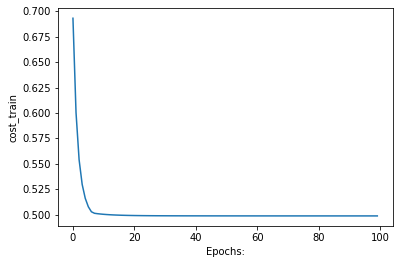

In [23]:
import matplotlib.pyplot as plt1

# plotting Loss
plt1.plot(e)
plt1.ylabel('cost_train')
plt1.xlabel("Epochs:")
plt1.show()

In [24]:
e=[]

In [25]:
parameters = nn_model(test_set_x, test_set_y, n_h_1=10 ,n_h_2=5 , num_iterations = 100, print_cost=True)

w1:====== [[-4.16757847e-03 -5.62668272e-04 -2.13619610e-02  1.64027081e-02
  -1.79343559e-02 -8.41747366e-03  5.02881417e-03 -1.24528809e-02]
 [-1.05795222e-02 -9.09007615e-03  5.51454045e-03  2.29220801e-02
   4.15393930e-04 -1.11792545e-02  5.39058321e-03 -5.96159700e-03]
 [-1.91304965e-04  1.17500122e-02 -7.47870949e-03  9.02525097e-05
  -8.78107893e-03 -1.56434170e-03  2.56570452e-03 -9.88779049e-03]
 [-3.38821966e-03 -2.36184031e-03 -6.37655012e-03 -1.18761229e-02
  -1.42121723e-02 -1.53495196e-03 -2.69056960e-03  2.23136679e-02]
 [-2.43476758e-02  1.12726505e-03  3.70444537e-03  1.35963386e-02
   5.01857207e-03 -8.44213704e-03  9.76147160e-08  5.42352572e-03]
 [-3.13508197e-03  7.71011738e-03 -1.86809065e-02  1.73118467e-02
   1.46767801e-02 -3.35677339e-03  6.11340780e-03  4.79705919e-04]
 [-8.29135289e-03  8.77102184e-04  1.00036589e-02 -3.81092518e-03
  -3.75669423e-03 -7.44707629e-04  4.33496330e-03  1.27837923e-02]
 [-6.34679305e-03  5.08396243e-03  2.16116006e-03 -1.858612

In [26]:
predictions = predict(parameters, test_set_x)
print ('Accuracy: %d' % float((np.dot(test_set_y,predictions.T) + np.dot(1-test_set_y,1-predictions.T))/float(test_set_y.size)*100) + '%')

Accuracy: 79%


In [27]:
predictions = predict(parameters, test_set_x)
accuracy = float((np.dot(test_set_y,predictions.T) + np.dot(1-test_set_y,1-predictions.T))/float(test_set_y.size)*100)
print ("Accuracy ", accuracy)

Accuracy  79.58741371006582


In [28]:
e

[0.6930439221890862,
 0.6035501717665223,
 0.5588292521540104,
 0.5353409449738162,
 0.5220890613349186,
 0.513909596533525,
 0.5093096290848472,
 0.5083189330020241,
 0.5078694418704345,
 0.5075257630356798,
 0.5072524147626226,
 0.5070289818185835,
 0.5068449705106395,
 0.5066924842918862,
 0.5065654927104066,
 0.5064595796527334,
 0.5063697459119675,
 0.5062927428356955,
 0.5062278137664499,
 0.5061712486113411,
 0.5061233296649443,
 0.5060792900511704,
 0.5060387568193925,
 0.5060041512852153,
 0.5059777579767235,
 0.5059553700289626,
 0.5059358865959541,
 0.505917316600623,
 0.5059014822391104,
 0.5058895035865626,
 0.5058786917491509,
 0.505868395508171,
 0.5058599632348886,
 0.5058532292663637,
 0.5058474849311554,
 0.5058424129629265,
 0.5058380867746176,
 0.5058343831727488,
 0.5058310556560617,
 0.5058237709574972,
 0.5058146539397241,
 0.5058078009488005,
 0.5058026994538765,
 0.5057979909941324,
 0.5057934860719993,
 0.5057888587062,
 0.5057839037290675,
 0.5057804277250447

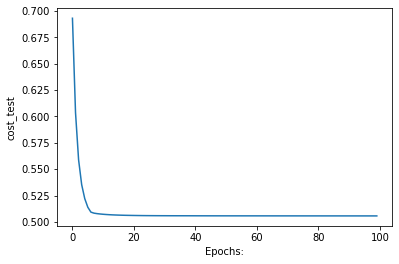

In [29]:
import matplotlib.pyplot as plt1

# plotting Loss
plt1.plot(e)
plt1.ylabel('cost_test')
plt1.xlabel("Epochs:")
plt1.show()

In [30]:
#learning rate=0.0001
# calculate mean
m = sum(e) / len(e)

# calculate variance using a list comprehension
var_res = sum((xi - m) ** 2 for xi in e) / len(e)

In [31]:
print("mean:===",m)
print("variance:===",var_res)

mean:=== 0.5098857114299079
variance:=== 0.00046995949627522945


In [32]:
result=[80.10234798314269 , 79.58741371006582]

#accuracy
# calculate mean
m = sum(result) / len(result)

# calculate variance using a list comprehension
var_res = sum((xi - m) ** 2 for xi in result) / len(result)

In [33]:
print("mean:===",m)
print("variance:===",var_res)

mean:=== 79.84488084660425
variance:=== 0.06628932639730245


# سوال 10

تمامی کد ها بر این اساس نوشته شده است 
در صورت سوال بیشتر در تحویل حضوری پاسخ خواهم داد